# ANÁLISIS DE LA SEGUNDA EVALUACIÓN
## IES Puerto de la Cruz - Telesforo Bravo | Curso 2017-2018

In [681]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML
import os

## CARGA DE DATOS

In [682]:
YEAR, EVALUATION = 2017, 2

In [683]:
df = pd.DataFrame()
labels = []
for y in range(YEAR - 2, YEAR + 1):
    year_label = "C" + str(y)[2:] + str(y + 1)[2:]
    path = os.path.join("../data", year_label + ".xlsx")
    if y == YEAR:
        num_evaluations = EVALUATION
    else:
        num_evaluations = 3
    for ev in range(1, num_evaluations + 1):
        evaluation_label = f"E{ev}"
        data = pd.read_excel(path, sheet_name=evaluation_label)
        data["curso"] = year_label
        data["evaluación"] = evaluation_label
        data.set_index(["curso", "evaluación", "grupo"], inplace=True)
        df = df.append(data)
        labels.append((year_label, evaluation_label))
df.fillna(0, inplace=True)

In [684]:
df.head()

etapa  éxito  absentismo  partes  \
curso evaluación grupo                                    
C1516 E1         ESO1A   ESO   23.1     3.21325     1.0   
                 ESO1B   ESO   26.9     5.81450     0.0   
                 ESO1C   ESO   26.9     4.06200     1.0   
                 ESO1D   ESO    0.0     0.00000     0.0   
                 ESO2A   ESO   40.0     1.69925     1.0   

                        suspensión_asistencia  ratio  
curso evaluación grupo                                
C1516 E1         ESO1A                    0.0   26.0  
                 ESO1B                    0.0   26.0  
                 ESO1C                    0.0   26.0  
                 ESO1D                    0.0    0.0  
                 ESO2A                    0.0   20.0

In [685]:
# dataframe for current year and evaluation
dfc = df.loc[labels[-1]]

In [686]:
# dataframe for comparisons with last evaluation
df_comp = dfc.merge(df.loc[labels[-2]], left_index=True, right_index=True)

In [687]:
def get_data_by_stages(df, stages):
    if not isinstance(stages, list):
        stages = [stages]
    return df[df["etapa"].isin(stages)]

In [688]:
def makeup_chart(fontsize, value_margin, is_percentage):
    if is_percentage:
        percentage_symbol = "%"
    else:
        percentage_symbol = ""
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(fontsize=fontsize)
    ax = plt.gca()
    # show values in bars
    for p in ax.patches:
        ax.annotate(
            "{:.0f}{}".format(p.get_height(), percentage_symbol),
            (p.get_x() + p.get_width() / 2., p.get_height() - value_margin),
            ha="center", va="center", fontsize=fontsize, color="white"
        )
    # hide chart frame
    for spine in ax.spines.values():
        spine.set_visible(False)
    # hide ticks
    plt.tick_params(top="off", bottom="off", left="off",
                    right="off", labelleft="off", labelbottom="on")

In [689]:
def bar_chart(serie, value_margin=3, is_percentage=True):
    FONTSIZE = 20
    serie = serie.sort_values()
    plt.figure(figsize=(30, 10), dpi=96)
    sns.barplot(serie.index, serie)
    makeup_chart(FONTSIZE, value_margin, is_percentage)

In [690]:
def factor_chart(data, y, value_margin=2, is_percentage=True, estimator=np.mean):
    FONTSIZE = 12
    colors = ["orange red", "windows blue", "amber"]  
    custom_palette = sns.xkcd_palette(colors)
    sns.factorplot(x="etapa", y=y, hue="curso", size=7, aspect=2, legend=False, estimator=estimator,
                   data=df.reset_index(), kind="bar", palette=custom_palette, ci=None)
    plt.legend(loc="upper left", prop={"size": FONTSIZE})
    makeup_chart(FONTSIZE, value_margin, is_percentage)

In [691]:
def delta_chart(progress_groups, backward_groups, label):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    g = sns.barplot(progress_groups.index, progress_groups["delta"], ax=ax1, palette="Greens_r")
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(color="gray", linestyle="-", alpha=0.5)
    ax1.set_title(f"Grupos con mayor progreso en {label}")
    
    g = sns.barplot(backward_groups.index, backward_groups["delta"], ax=ax2, palette="Reds")
    ax2.set_axisbelow(True)
    ax2.yaxis.grid(color="gray", linestyle="-", alpha=0.5)
    ax2.set_title(f"Grupos con mayor retroceso en {label}")

# ÉXITO ESCOLAR

<div class="alert alert-success" role="alert">
    ÉXITO ESCOLAR = **0 suspensos**
</div>

## ESO + FPB

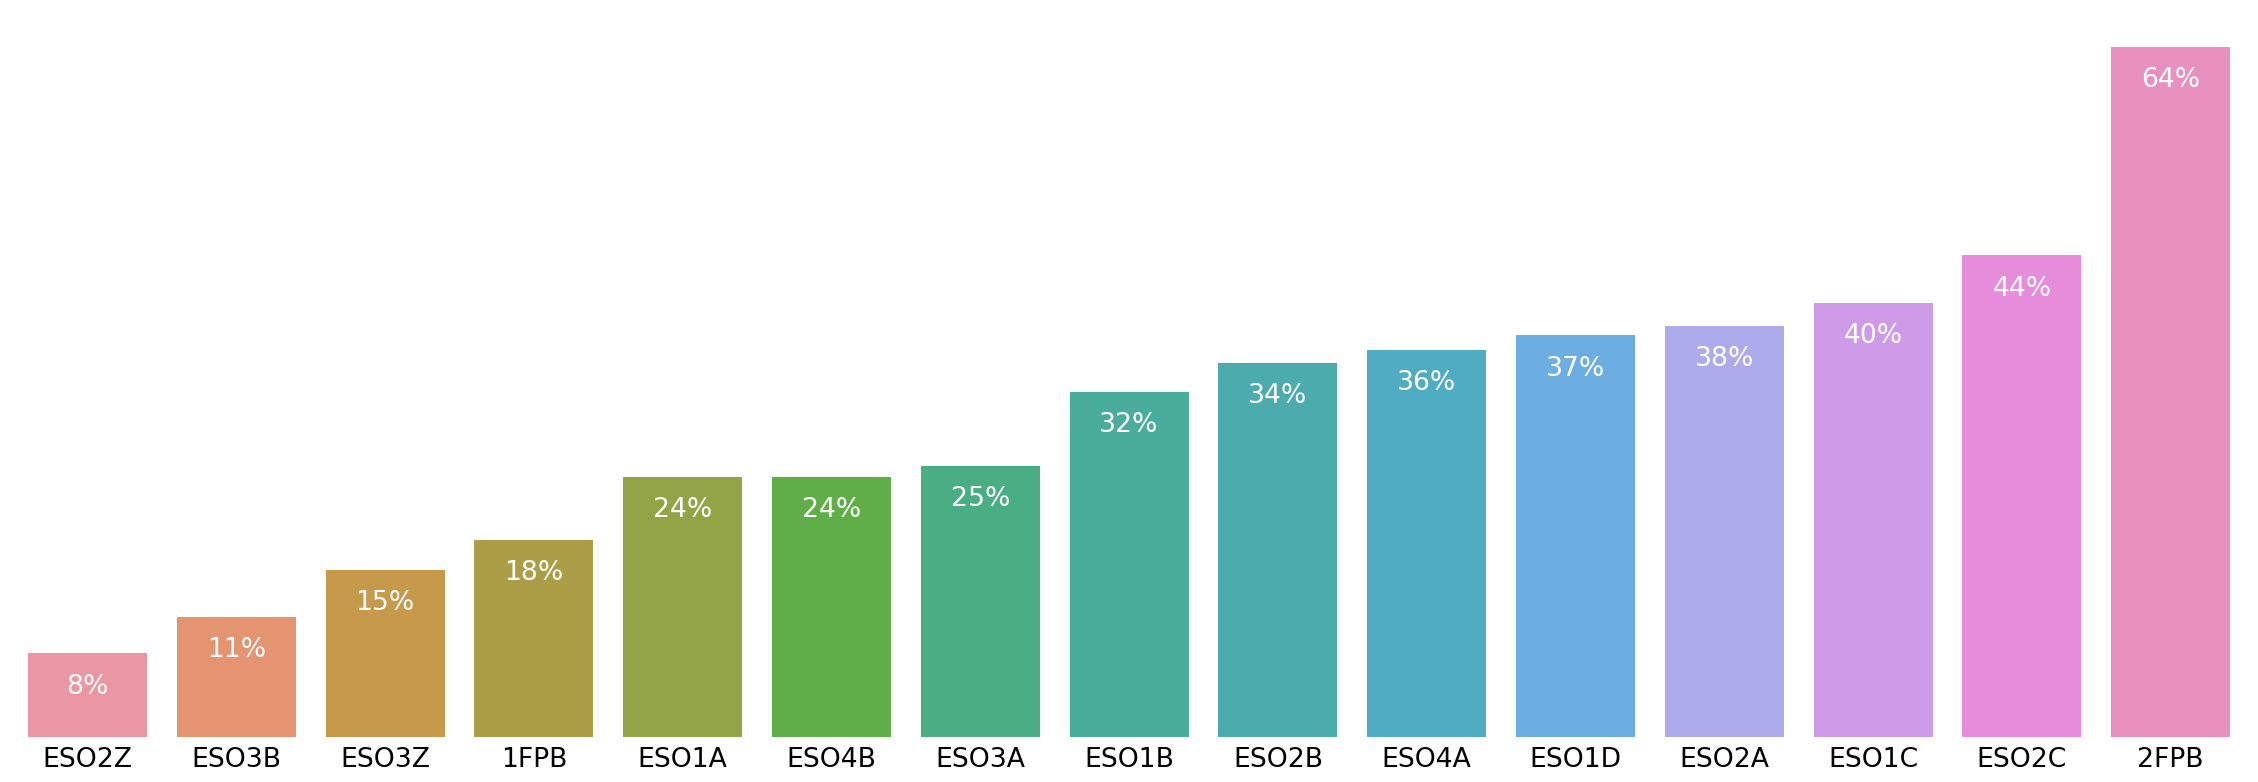

In [692]:
df_ESOFPB = get_data_by_stages(dfc, ["ESO", "FPB"])
bar_chart(df_ESOFPB["éxito"])

In [693]:
df_ESOFPB.mean()

éxito                    30.020000
absentismo                7.144000
partes                    5.666667
suspensión_asistencia     1.066667
ratio                    22.066667
dtype: float64

## BACHILLERATO

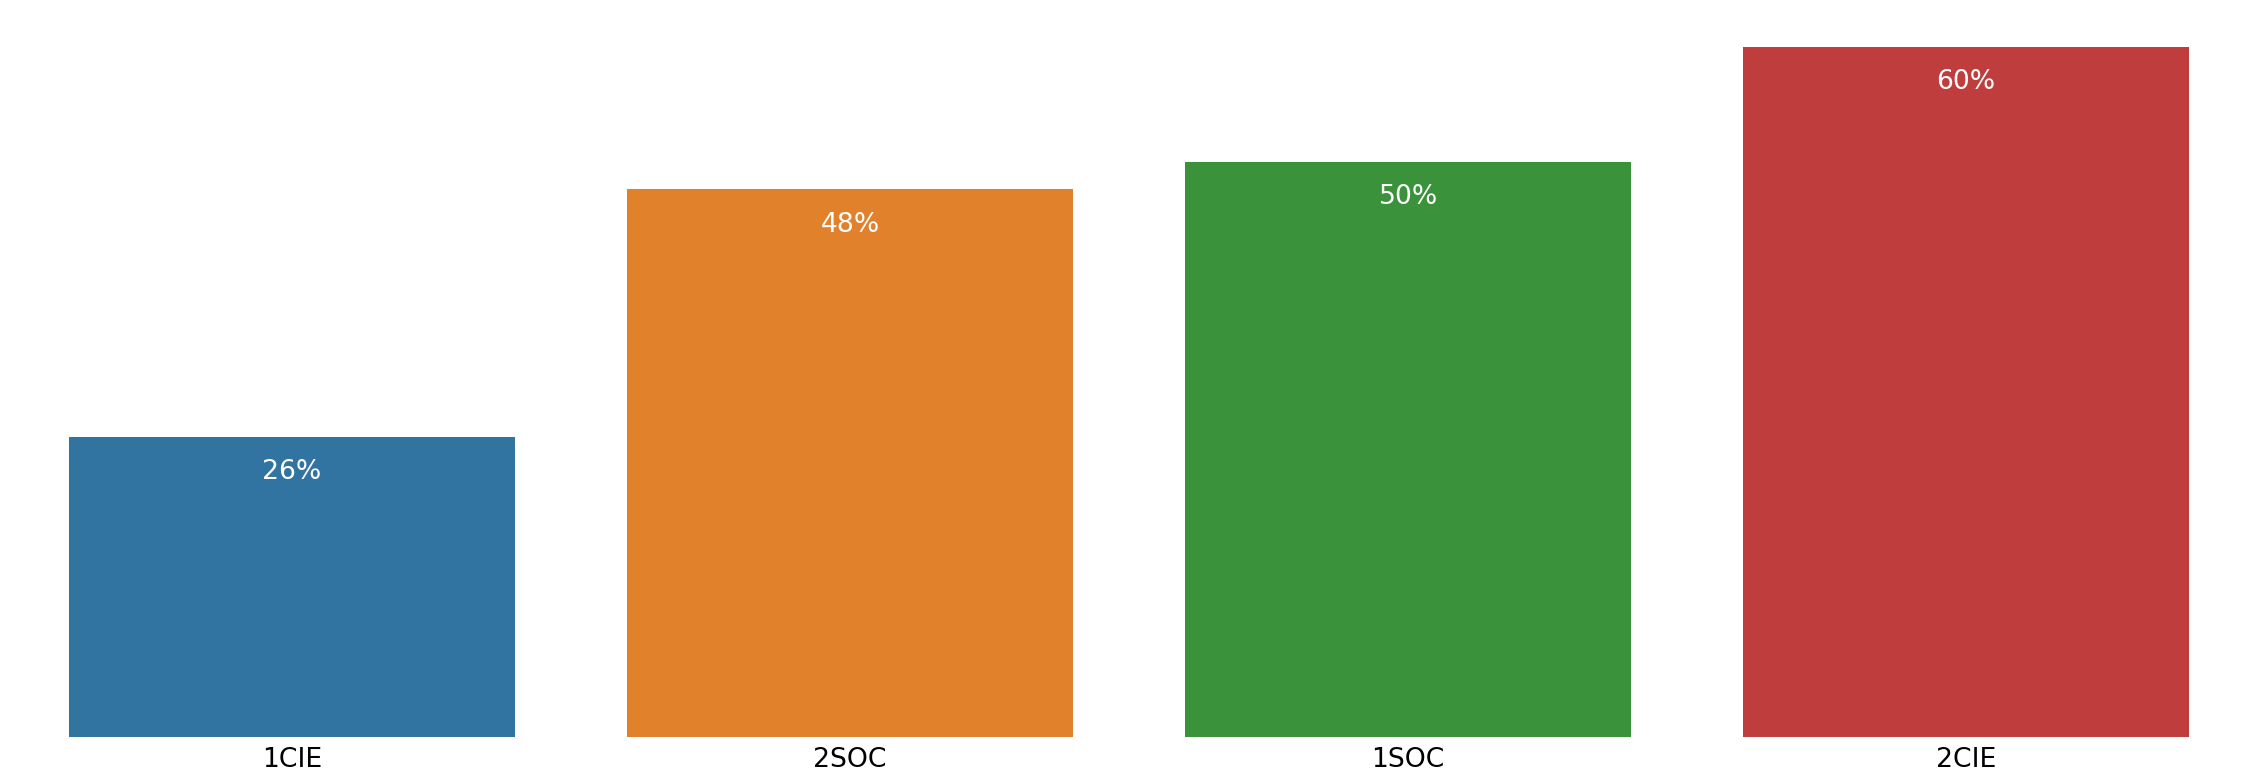

In [694]:
df_BACH = get_data_by_stages(dfc, "BACH")
bar_chart(df_BACH["éxito"])

In [695]:
df_BACH.mean()

éxito                    45.9250
absentismo                4.3775
partes                    0.0000
suspensión_asistencia     0.0000
ratio                    23.7500
dtype: float64

## CICLOS FORMATIVOS DE GRADO MEDIO

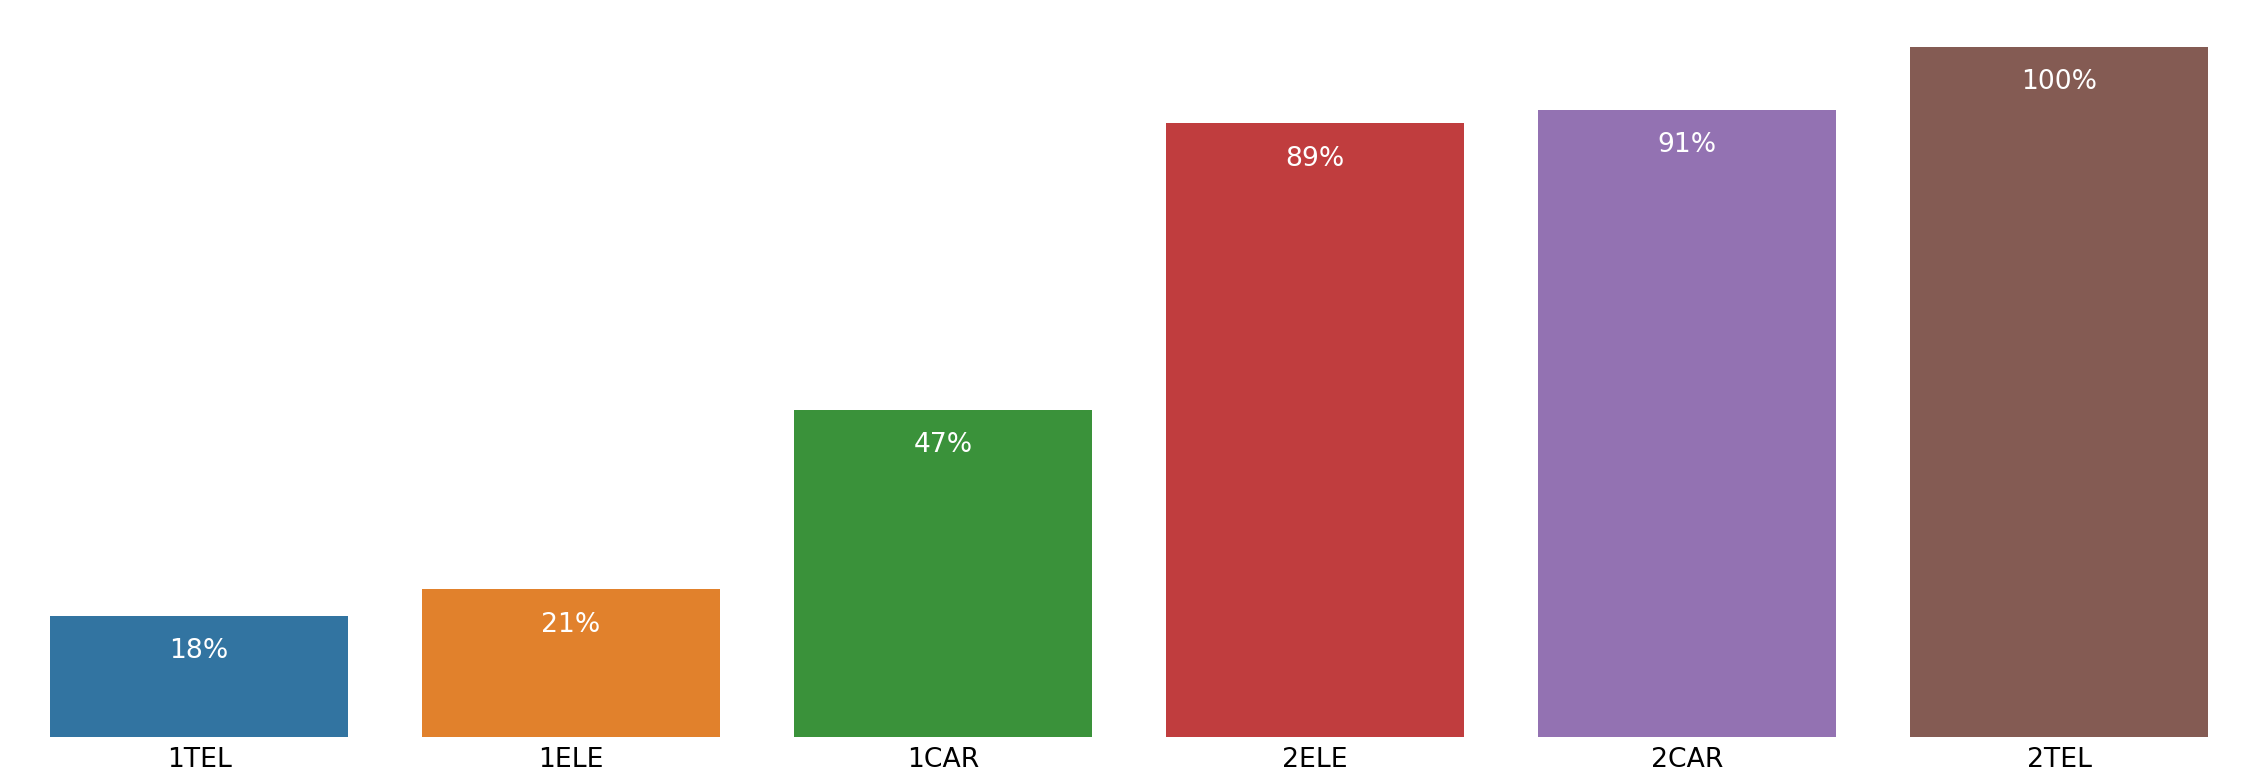

In [696]:
df_CFGM = get_data_by_stages(dfc, "CFGM")
bar_chart(df_CFGM["éxito"], 5)

In [697]:
df_CFGM.mean()

éxito                    61.033333
absentismo               10.906667
partes                    0.500000
suspensión_asistencia     0.000000
ratio                    13.500000
dtype: float64

## CICLOS FORMATIVOS DE GRADO SUPERIOR

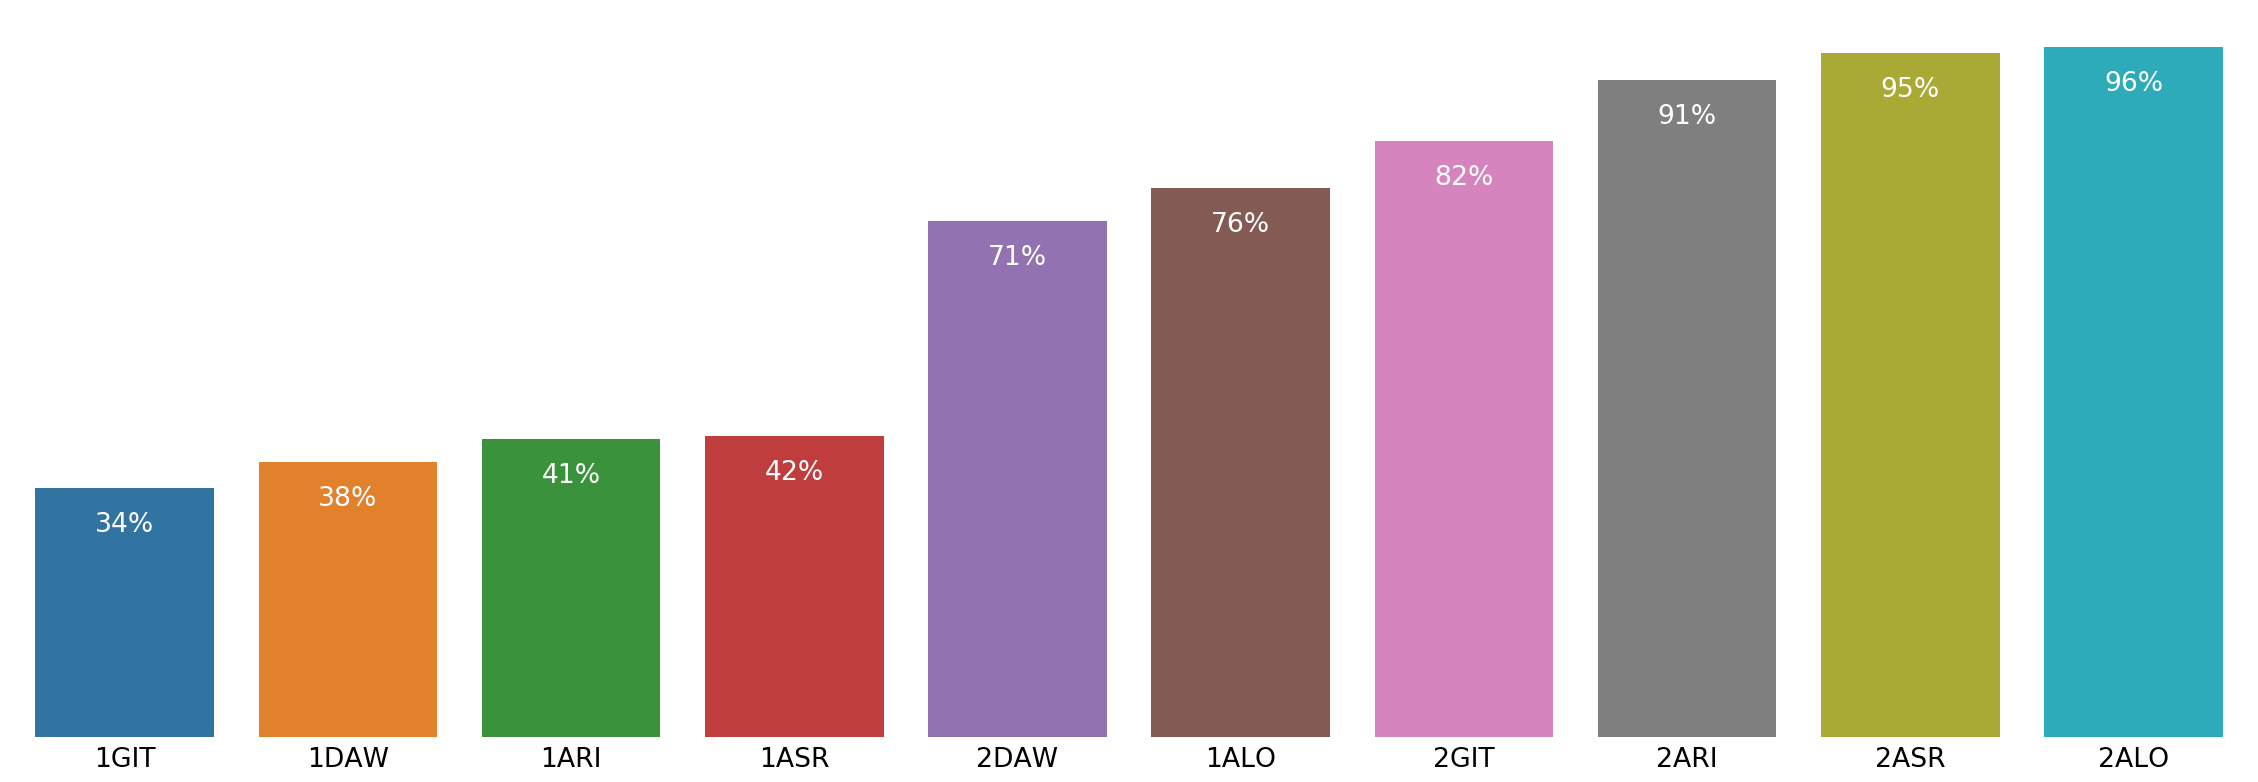

In [698]:
df_CFGS = get_data_by_stages(dfc, "CFGS")
bar_chart(df_CFGS["éxito"], 5)

In [699]:
df_CFGS.mean()

éxito                    66.630
absentismo                9.297
partes                    0.000
suspensión_asistencia     0.000
ratio                    20.300
dtype: float64

## GLOBAL

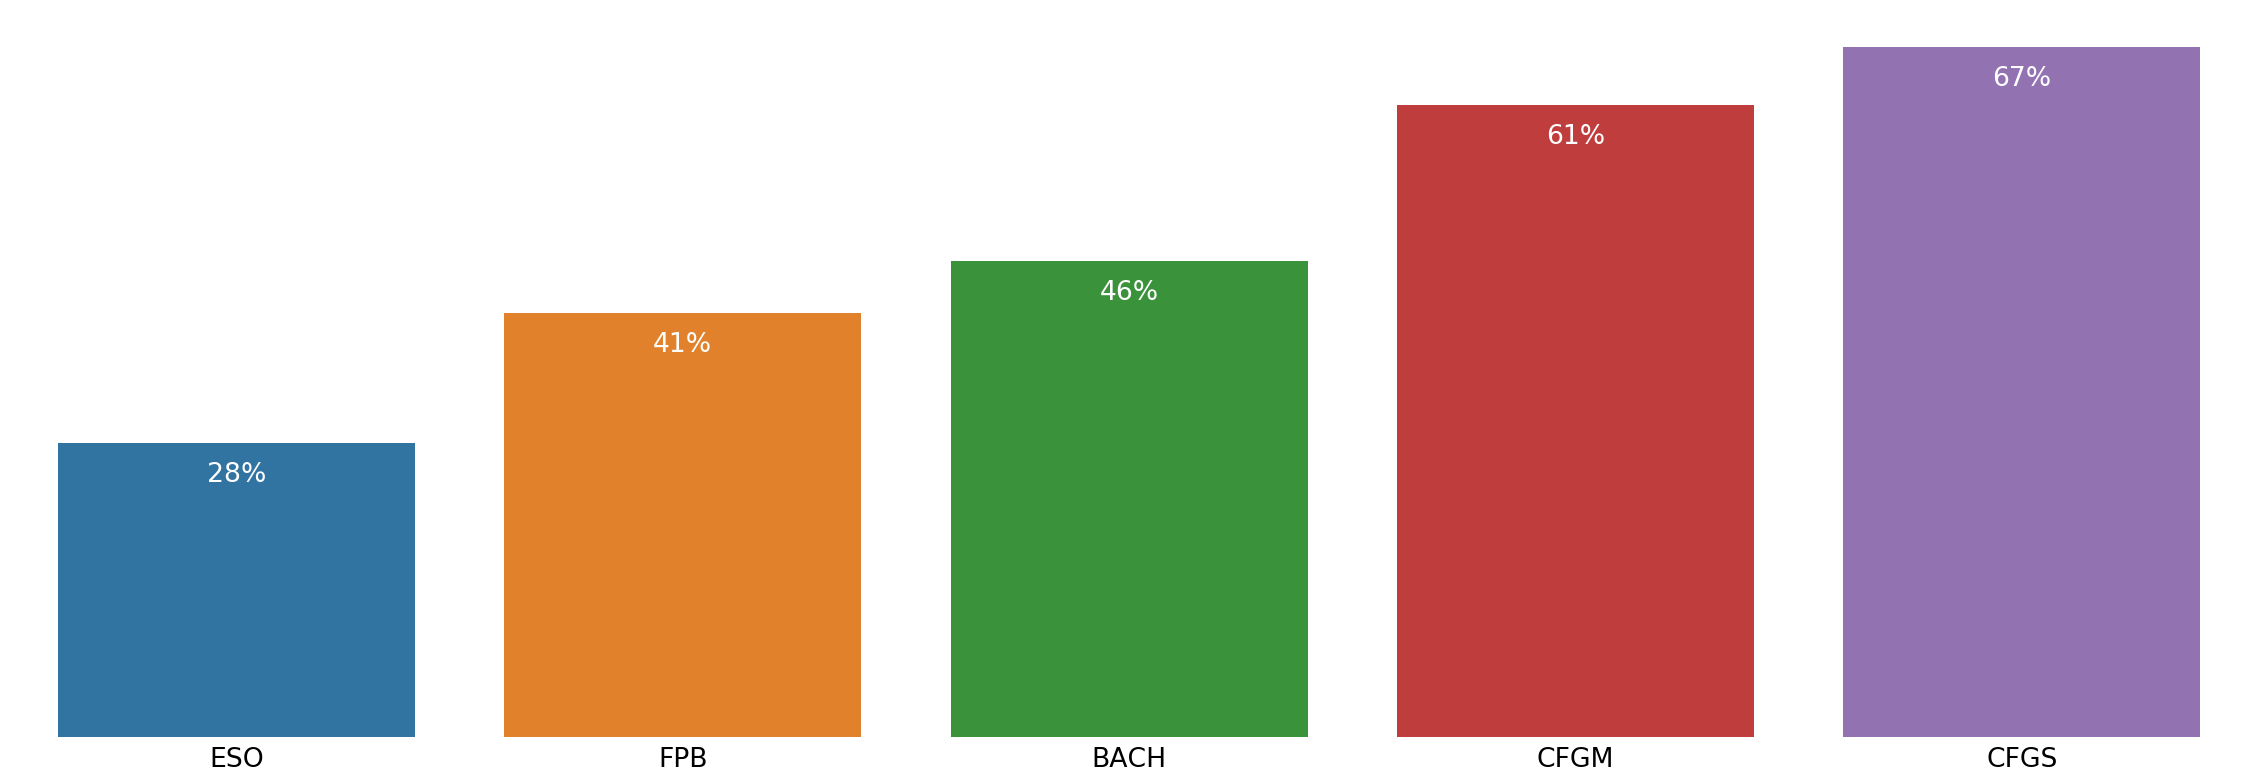

In [700]:
df_summary = dfc.groupby("etapa").mean()
bar_chart(df_summary["éxito"])

## COMPARATIVA CON LOS ÚLTIMOS CURSOS

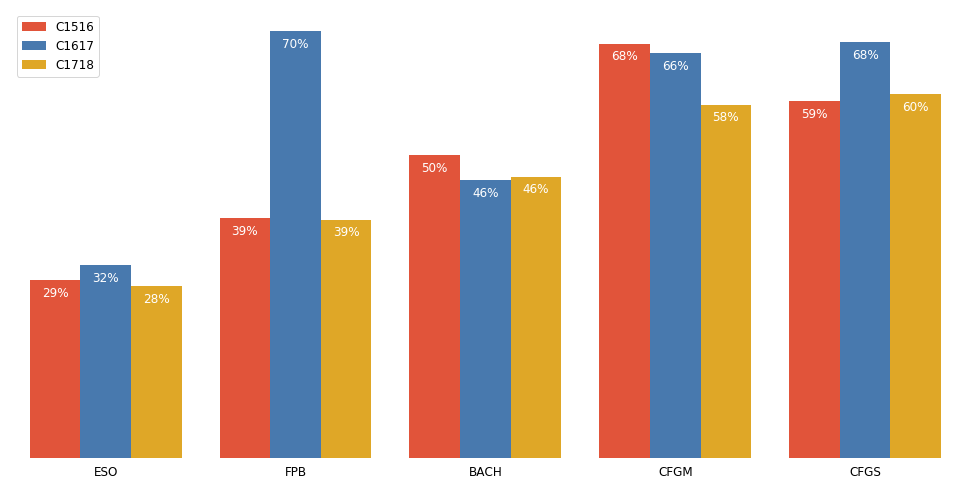

In [701]:
factor_chart(df.reset_index(), "éxito")

In [702]:
mean_success = dfc["éxito"].mean()
display(HTML(f"""
<div class='alert alert-info' role='alert'>
    Éxito global medio: <b>{mean_success:.2f}</b>%
</div>
"""))

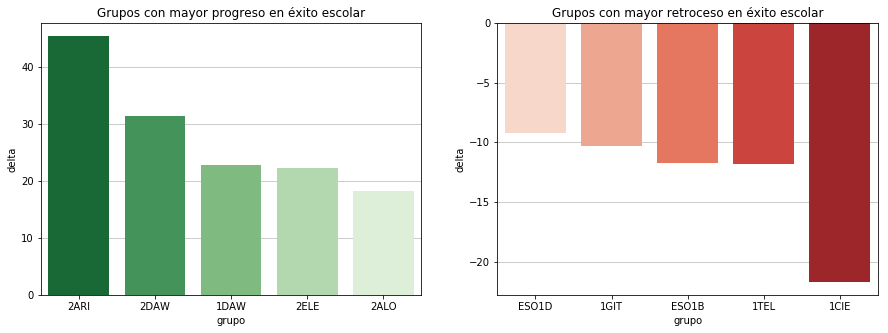

In [703]:
if EVALUATION > 1:
    display(HTML("<h2>EVOLUCIÓN DE GRUPOS CON RESPECTO A LA EVALUACIÓN ANTERIOR"))
    df_comp["delta"] = df_comp["éxito_x"] - df_comp["éxito_y"]
    df_comp = df_comp.sort_values("delta", ascending=False)
    delta_chart(df_comp.head(5), df_comp.tail(5), "éxito escolar")

## COMPETENCIAS BÁSICAS

In [704]:
COMPETENCE_CRITERIA = {
    "PA-%": "PA",
    "AD-%": "AD",
    "MA-%": "MA",
    "EX-%": "EX"
}

STUDIES = {
    "1º Educación Secundaria Obligatoria (LOMCE)": "1ESO",
    "2º Educación Secundaria Obligatoria (LOMCE)": "2ESO",
    "3º Educación Secundaria Obligatoria (LOMCE)": "3ESO",
    "4º Educación Secundaria Obligatoria (LOMCE)": "4ESO",
    "Primer curso del Programa de Mejora del Aprendizaje y el Rendimiento (LOMCE)": "1PMAR",
    "Segundo curso del Programa de Mejora del Aprendizaje y el Rendimiento (LOMCE)": "2PMAR"
}

COMPETENCE_ITEMS = {
    "Comunicación lingüística": "CL",
    "Competencia matemática y competencias básicas en ciencia y tecnología": "CMCT",
    "Competencia digital": "CD",
    "Aprender a aprender": "AAP",
    "Competencias sociales y cívicas": "CSC",
    "Sentido de iniciativa y espíritu emprendedor": "SIEE",
    "Conciencia y expresiones culturales": "CEC"
}

def reproduce_ccbb(df):
    ccbbs = list(CCBBs.values())
    c = 0
    for idx, _ in df.iterrows():
        ccbb = ccbbs[c]
        df.loc[idx, "VAL"] = ccbb
        df.loc[idx, "PORCENTAJE"] = df.loc[idx, ccbb]
        c += 1
    return df

# dataframe of basic competences
filename = "{}_ESO_CCBB.csv".format("".join(labels[-1]))
df_bc = pd.read_csv(os.path.join("../data", filename),
                      encoding="cp1252", sep=";", skipfooter=9, engine="python")
df_bc = df_bc[df_bc["GRUPO"] == "TOTAL ESTUDIO"]
df_bc = df_bc.rename(columns=COMPETENCE_CRITERIA)
df_bc = df_bc[["ESTUDIO", "ITEM", *COMPETENCE_CRITERIA.values()]]
df_bc["ESTUDIO"].replace(STUDIES, inplace=True)
df_bc["ITEM"].replace(COMPETENCE_ITEMS, inplace=True)
df_bc["VAL"] = None
df_bc["PORCENTAJE"] = None

# fill VAL and TOTAL columns
df_bc = pd.concat([df_bc]*4, ignore_index=True).groupby(["ESTUDIO", "ITEM"]).apply(reproduce_ccbb)
df_bc.drop(COMPETENCE_CRITERIA.values(), axis=1, inplace=True)

df_bc.head()

,ESTUDIO,ITEM,VAL,PORCENTAJE
0,1ESO,CL,PA,31
1,1ESO,CMCT,PA,24
2,1ESO,CD,PA,12
3,1ESO,AAP,PA,33
4,1ESO,CSC,PA,13


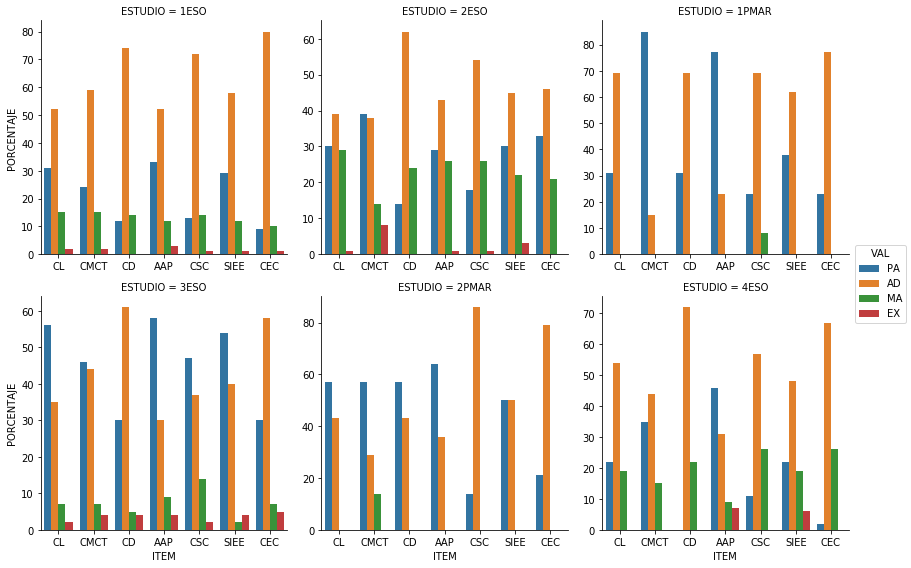

In [705]:
sns.factorplot(x="ITEM", y="PORCENTAJE", hue="VAL", col="ESTUDIO",
               data=df_bc, col_wrap=3, kind="bar", sharex=False, sharey=False)

# ABSENTISMO

<div class="alert alert-success" role="alert">
    ABSENTISMO = **Faltas justificadas + Faltas injustificadas**
</div>

## ESO + FPB

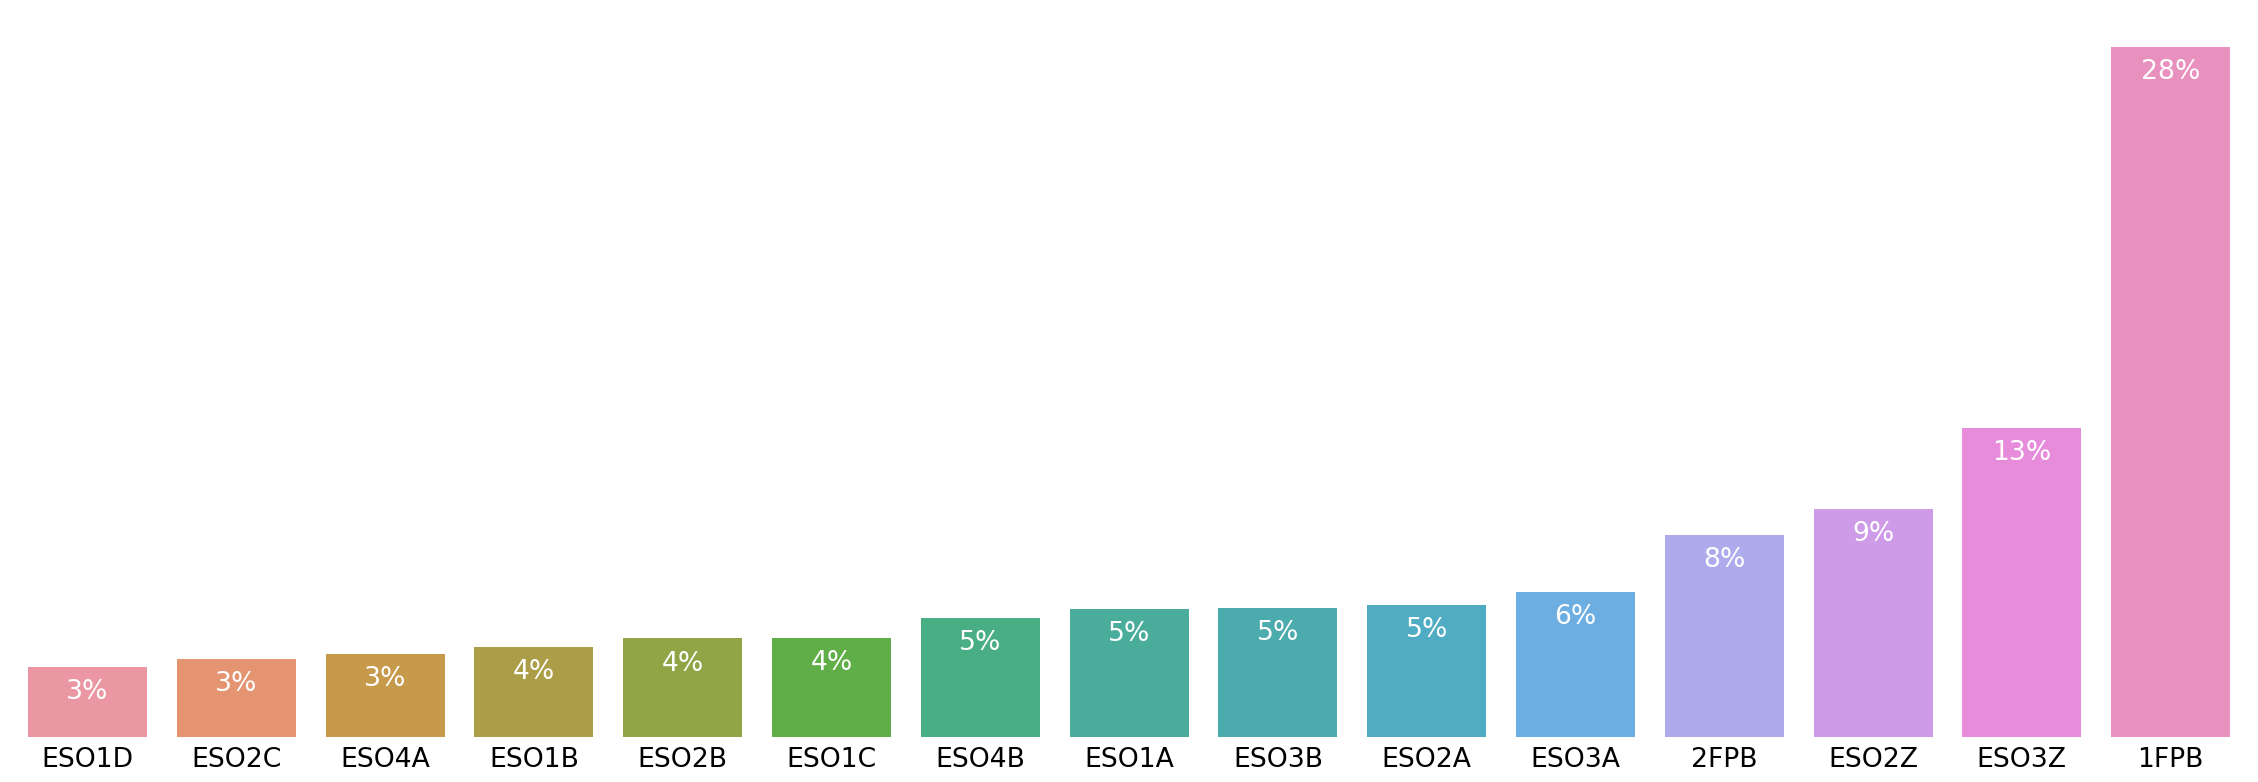

In [706]:
bar_chart(df_ESOFPB["absentismo"], 1)

## BACHILLERATO

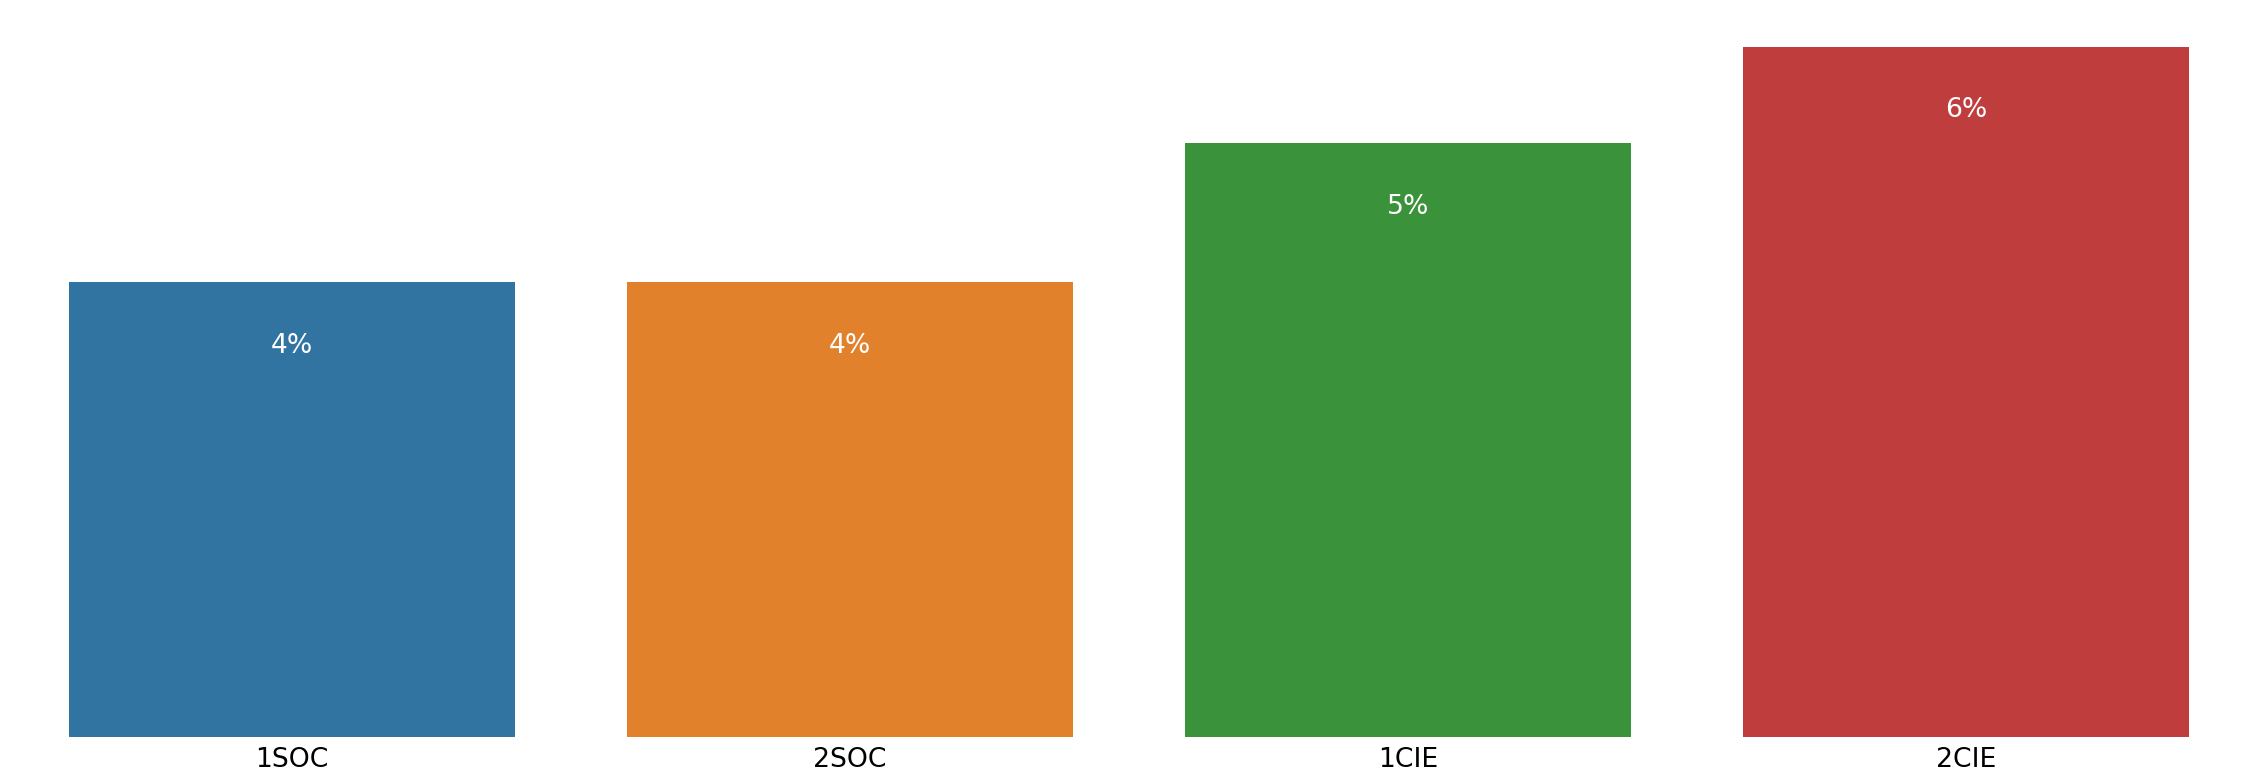

In [707]:
bar_chart(df_BACH["absentismo"], 0.5)

## CICLOS FORMATIVOS DE GRADO MEDIO

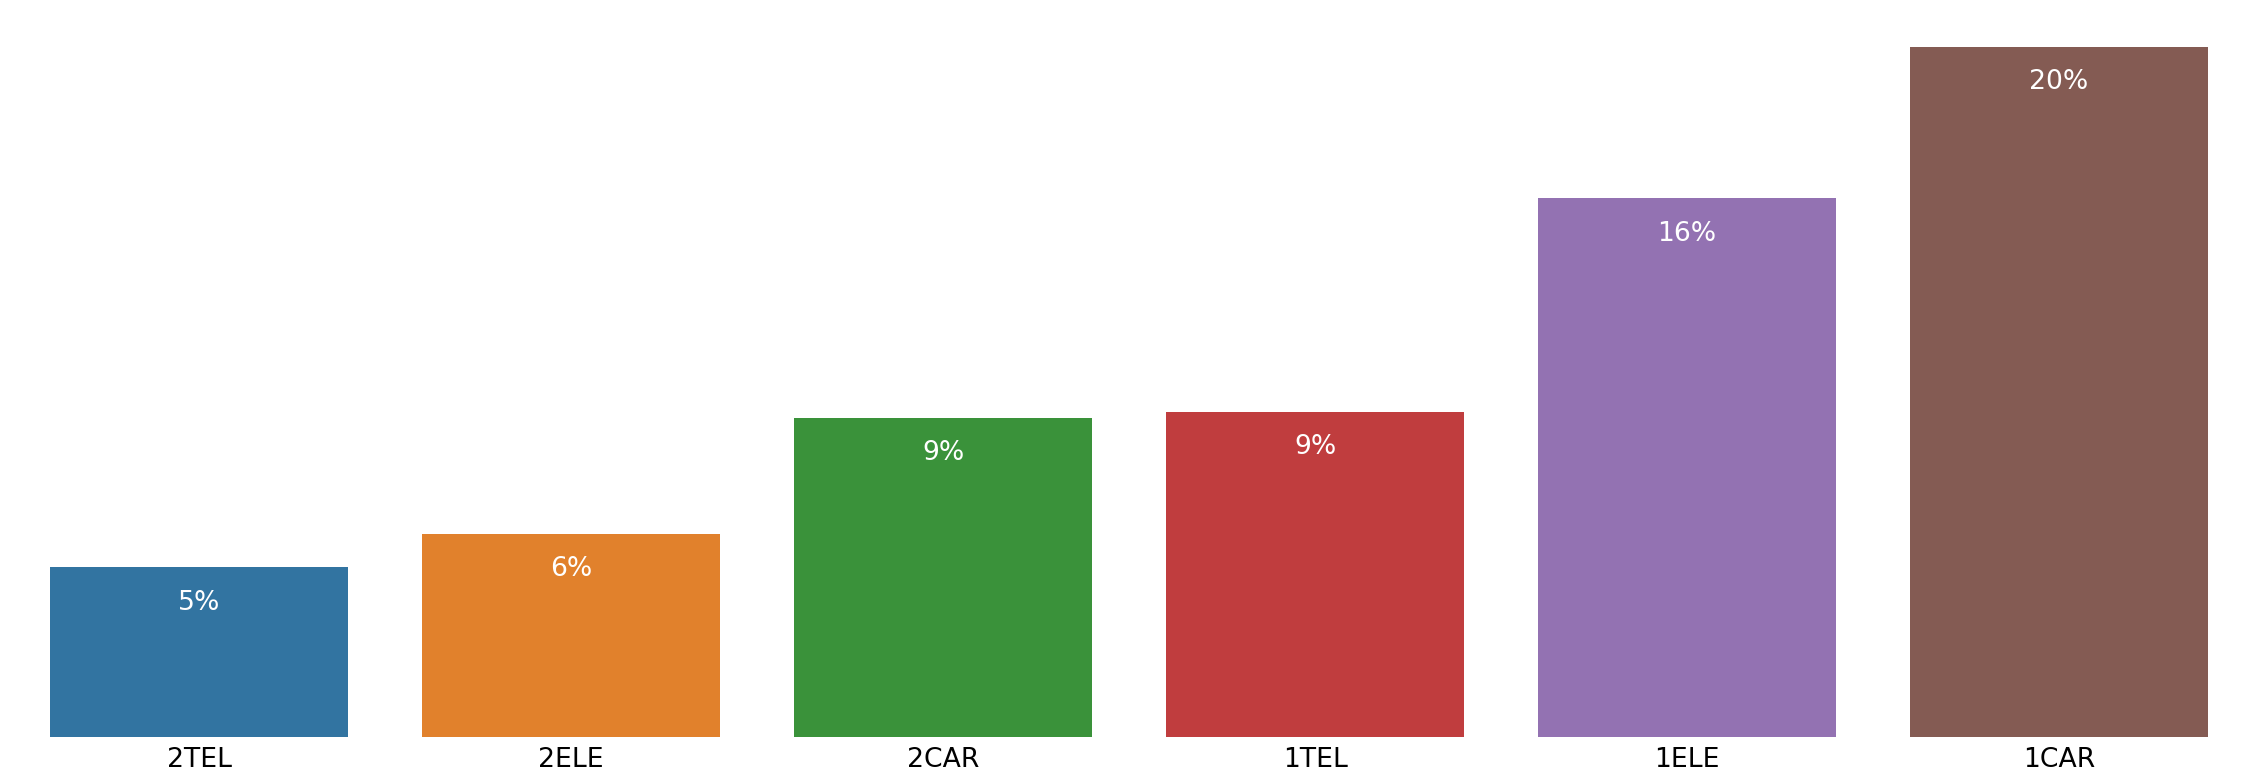

In [708]:
bar_chart(df_CFGM["absentismo"], 1)

## CICLOS FORMATIVOS DE GRADO SUPERIOR

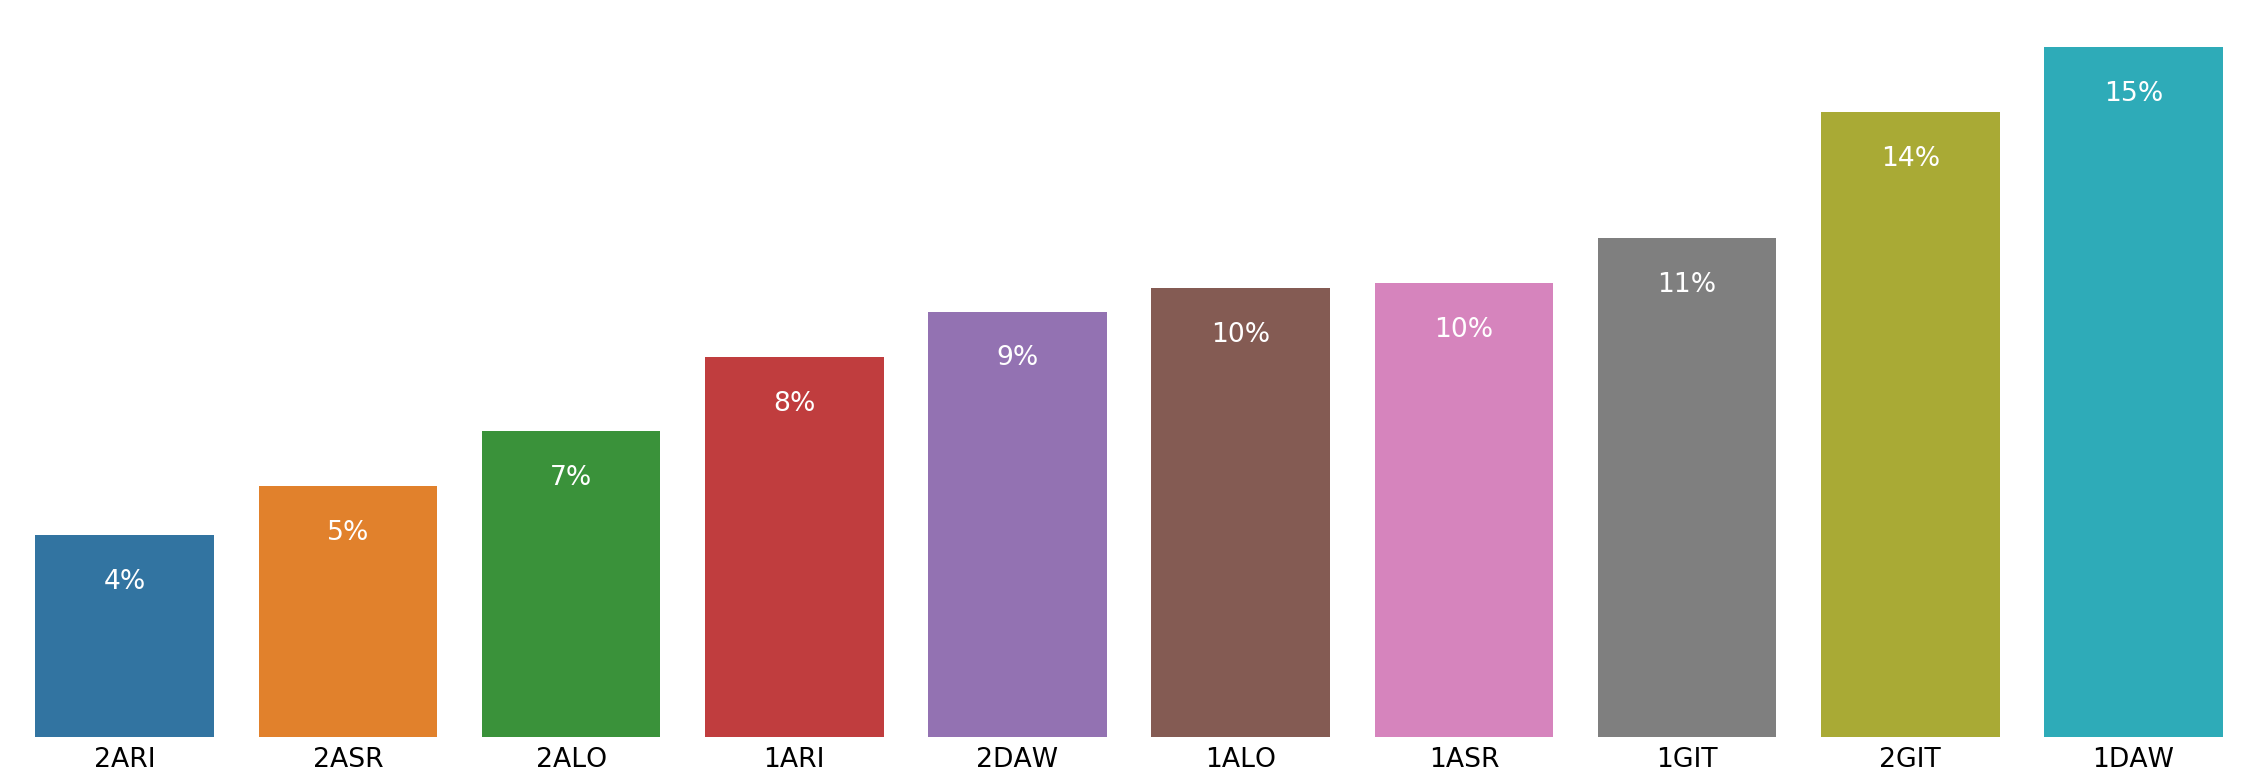

In [709]:
bar_chart(df_CFGS["absentismo"], 1)

## GLOBAL

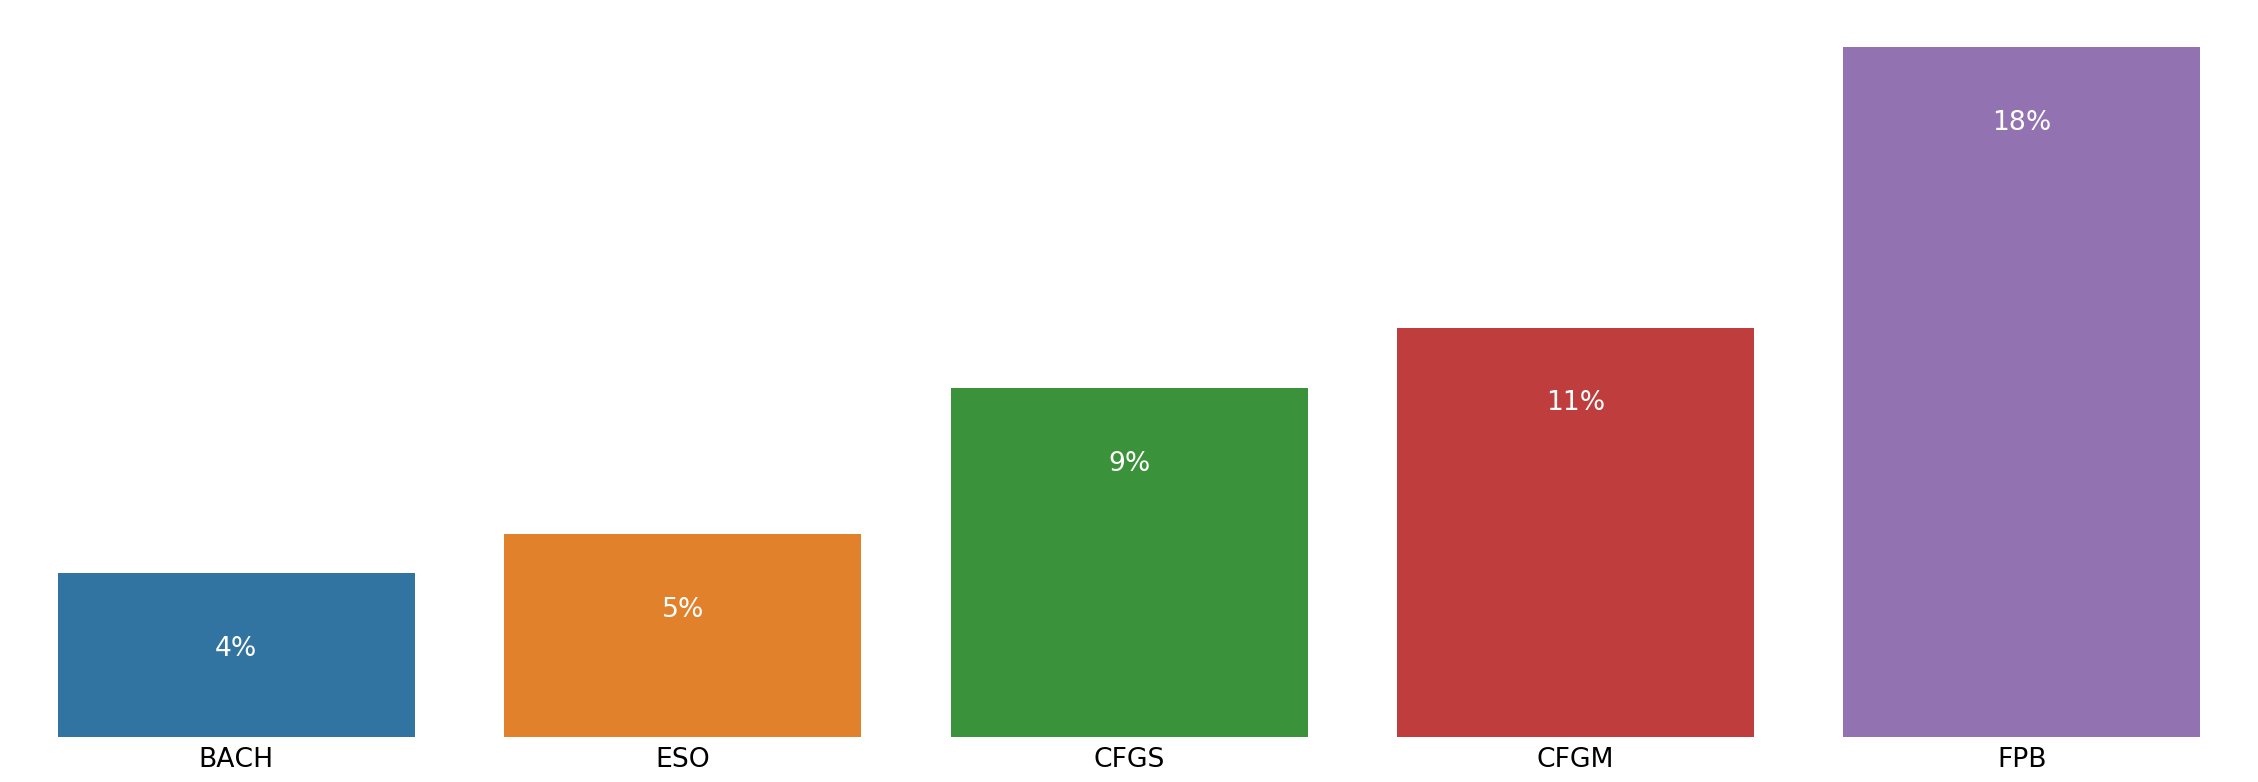

In [710]:
bar_chart(df_summary["absentismo"], 2)

## COMPARATIVA CON LOS ÚLTIMOS CURSOS

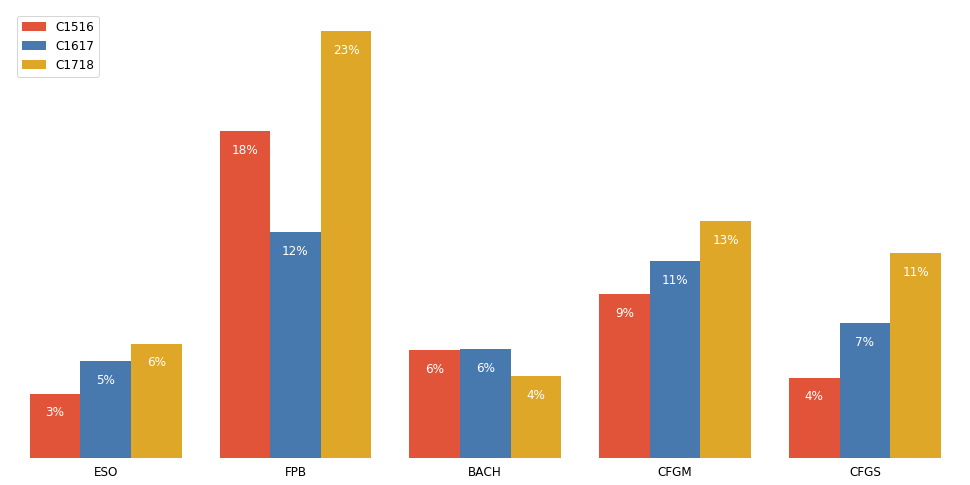

In [711]:
factor_chart(df.reset_index(), "absentismo", 1)

In [712]:
mean_absence = dfc["absentismo"].mean()
display(HTML(f"""
<div class='alert alert-info' role='alert'>
    Absentismo global medio: <b>{mean_absence:.2f}</b>%
</div>
"""))

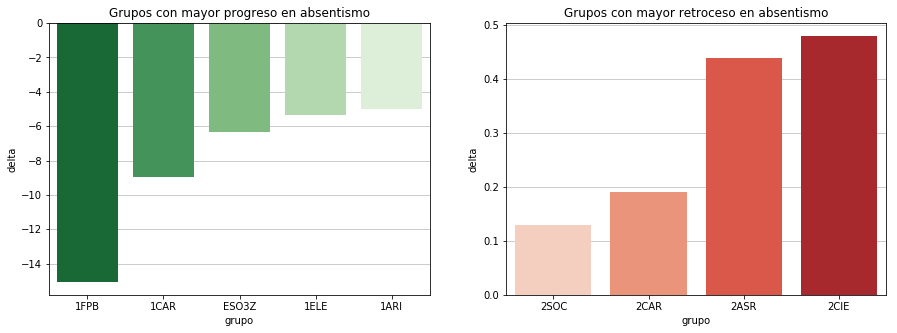

In [713]:
if EVALUATION > 1:
    display(HTML("<h2>EVOLUCIÓN DE GRUPOS CON RESPECTO A LA EVALUACIÓN ANTERIOR"))
    df_comp["delta"] = df_comp["absentismo_x"] - df_comp["absentismo_y"]
    df_comp = df_comp.sort_values("delta")
    delta_chart(df_comp.head(5), df_comp.tail(4), "absentismo")

# GESTIÓN DE LA CONVIVENCIA

## PARTES DE GESTIÓN

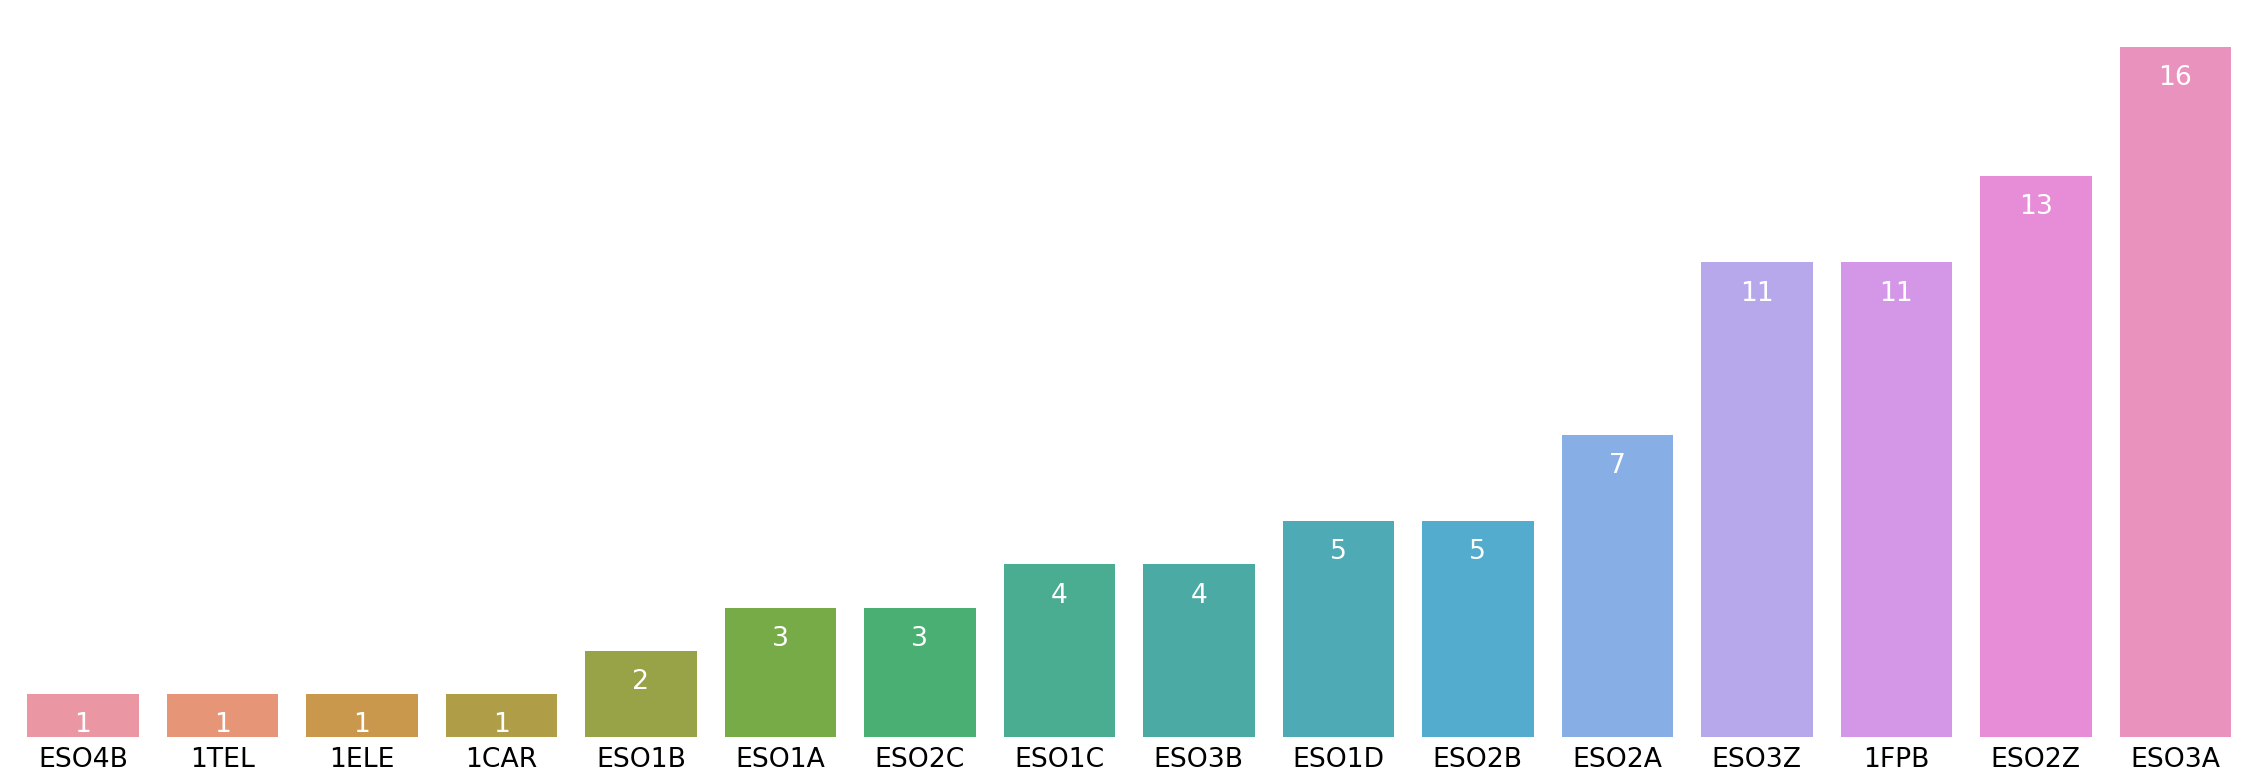

In [714]:
df_reports = dfc[dfc["partes"] > 0]["partes"]
bar_chart(df_reports, 0.7, False)

## COMPARATIVA CON LOS ÚLTIMOS CURSOS

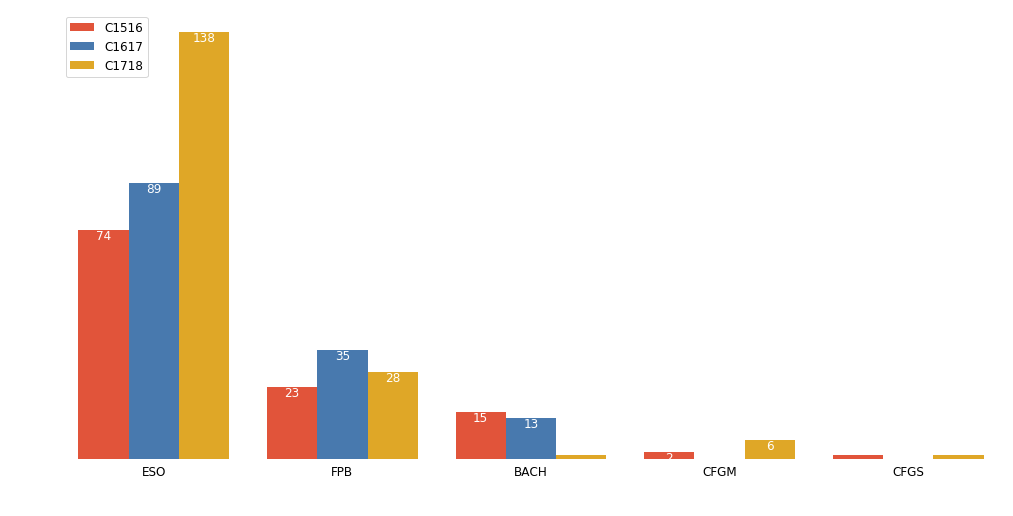

In [715]:
factor_chart(df.reset_index(), "partes", 2, False, np.sum)

In [716]:
total_reports = df_reports.sum()
display(HTML(f"""
<div class='alert alert-info' role='alert'>
    Total de partes de gestión: <b>{total_reports:.0f}</b>
</div>
"""))

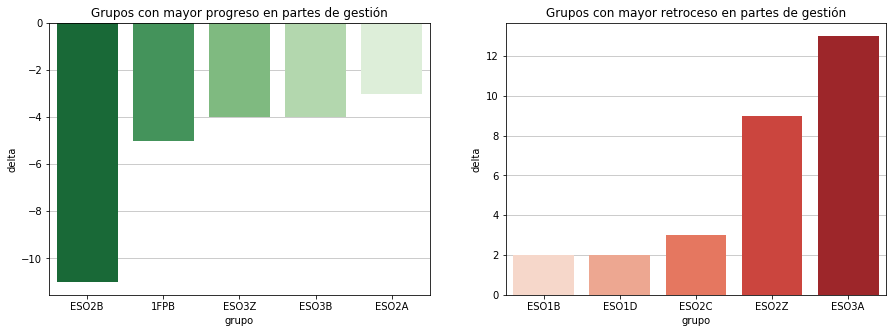

In [717]:
if EVALUATION > 1:
    display(HTML("<h2>EVOLUCIÓN DE GRUPOS CON RESPECTO A LA EVALUACIÓN ANTERIOR"))
    df_comp["delta"] = df_comp["partes_x"] - df_comp["partes_y"]
    df_comp = df_comp.sort_values("delta")
    delta_chart(df_comp.head(5), df_comp.tail(5), "partes de gestión")

## SUSPENSIÓN DEL DERECHO DE ASISTENCIA

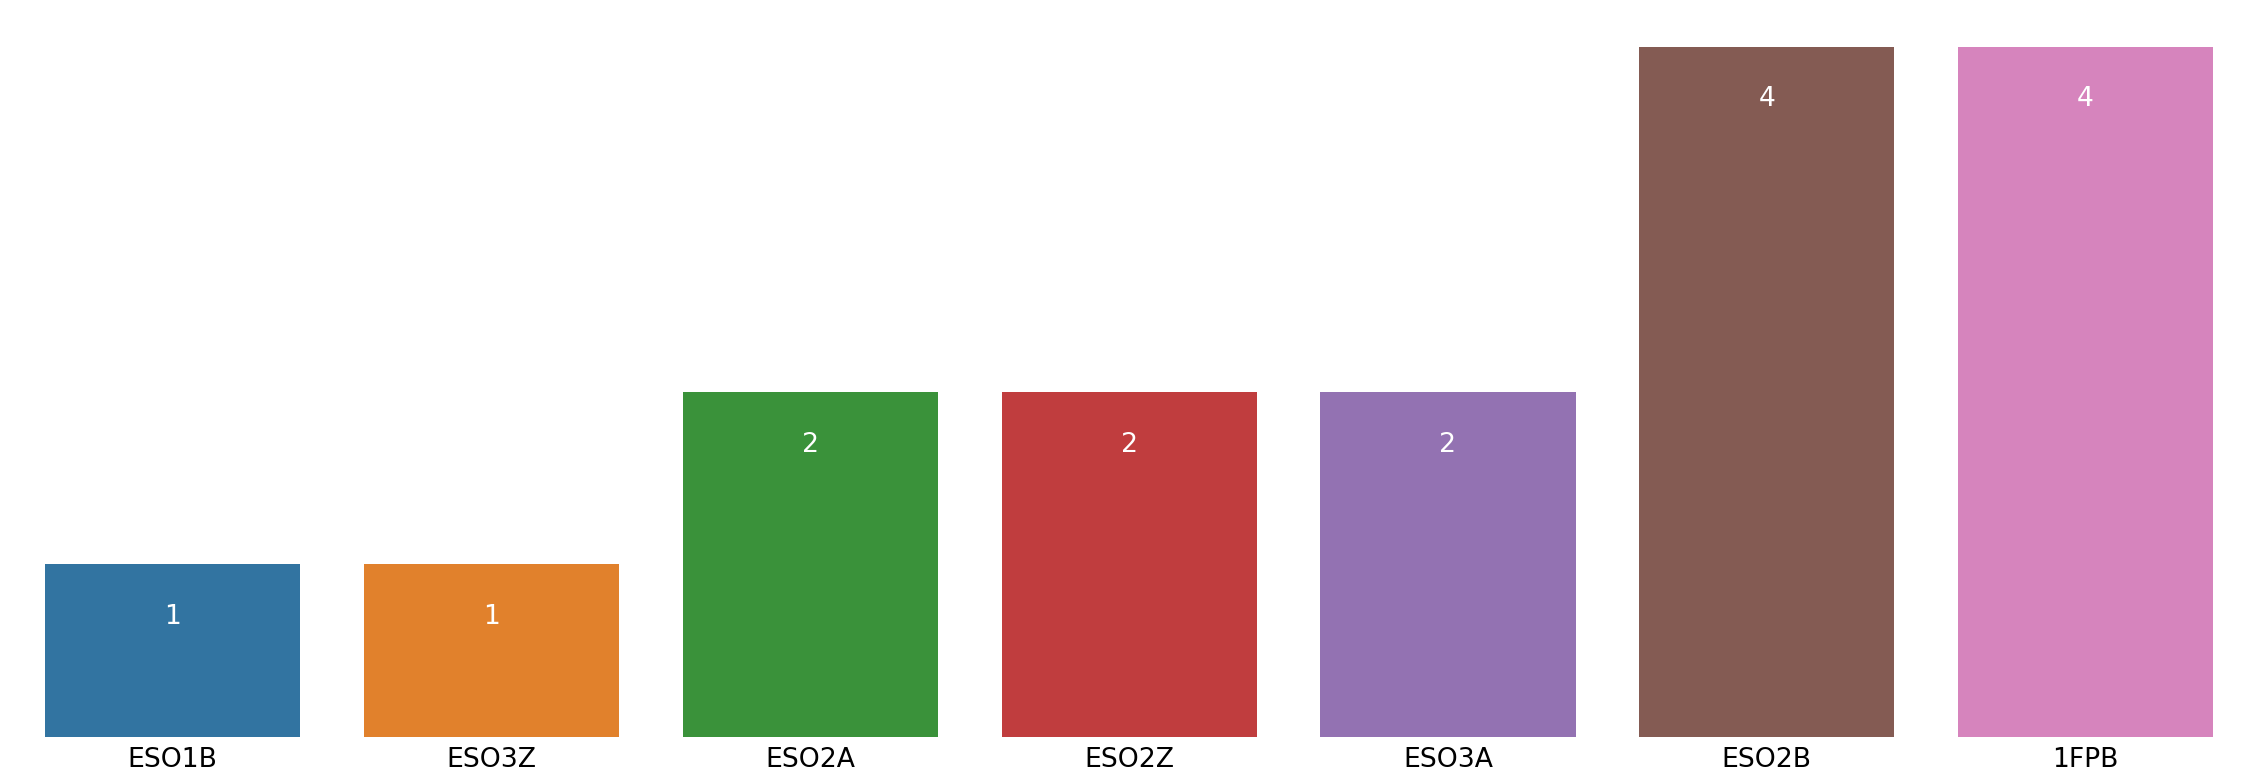

In [718]:
df_non_attendance = dfc[dfc["suspensión_asistencia"] > 0]["suspensión_asistencia"]
bar_chart(df_non_attendance, 0.3, False)

## COMPARATIVA CON LOS ÚLTIMOS CURSOS

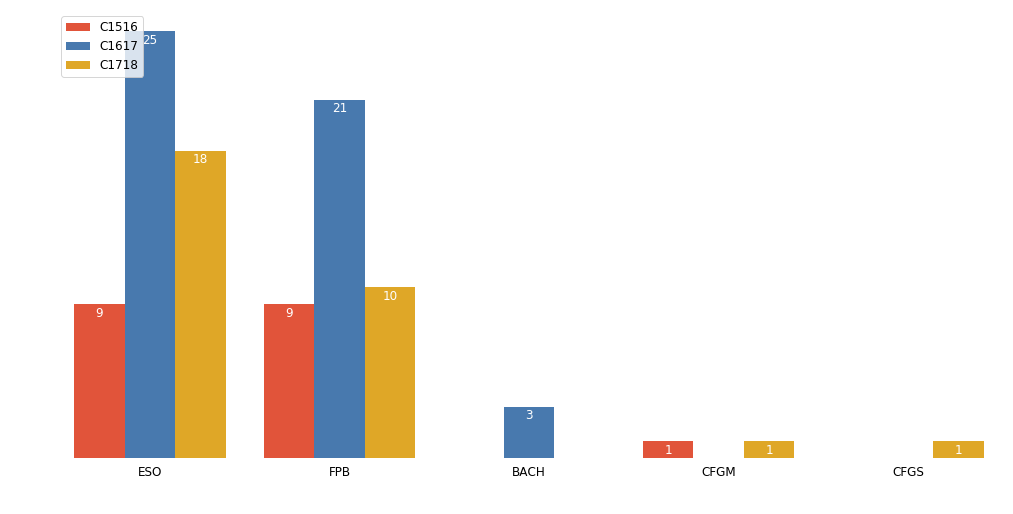

In [719]:
factor_chart(df.reset_index(), "suspensión_asistencia", .5, False, np.sum)

In [720]:
total_non_attendance = df_non_attendance.sum()
display(HTML(f"""
<div class='alert alert-info' role='alert'>
    Total de partes de gestión con <b>suspensión</b> del derecho de asistencia: <b>{total_non_attendance:.0f}</b>
</div>
"""))

# RELACIÓN `ratio-éxito`

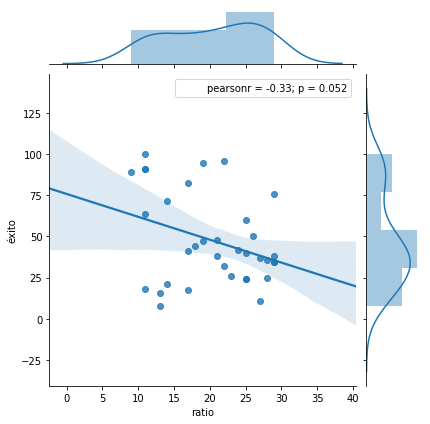

In [721]:
sns.jointplot("ratio", "éxito", dfc, kind="reg");

## Detección de *outliers*

### Baja ratio y bajo éxito

In [722]:
dfc[(dfc["ratio"] < 20) & (dfc["éxito"] < 20)][["ratio", "éxito"]]

,ratio,éxito
grupo,,
ESO2Z,13.0,7.7
ESO3Z,13.0,15.4
1FPB,11.0,18.2
1TEL,17.0,17.6


### Alta ratio y alto éxito

In [723]:
dfc[(dfc["ratio"] > 25) & (dfc["éxito"] > 50)][["ratio", "éxito"]]

,ratio,éxito
grupo,,
1ALO,29.0,75.9


# RELACIÓN `absentismo-éxito`

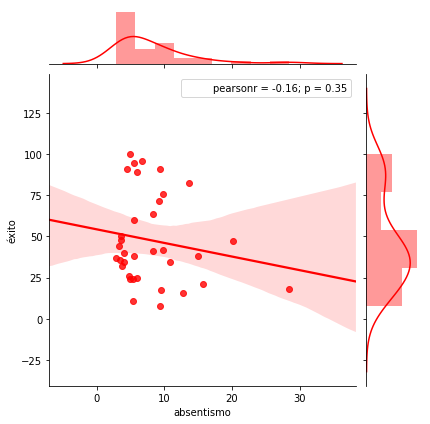

In [724]:
sns.jointplot("absentismo", "éxito", dfc, kind="reg", color="r");

## Detección de *outliers*

### Bajo absentismo y bajo éxito

In [725]:
dfc[(dfc["absentismo"] < 10) & (dfc["éxito"] < 10)][["absentismo", "éxito"]]

,absentismo,éxito
grupo,,
ESO2Z,9.39,7.7


### Alto absentismo y alto éxito

In [726]:
dfc[(dfc["absentismo"] > 25) & (dfc["éxito"] > 50)][["absentismo", "éxito"]]

,absentismo,éxito
grupo,,


# RELACIÓN `partes-éxito`

<div class="alert alert-warning" role="alert">
  **NOTA**: Sólo se tienen en cuenta grupos con algún parte de gestión.
</div>

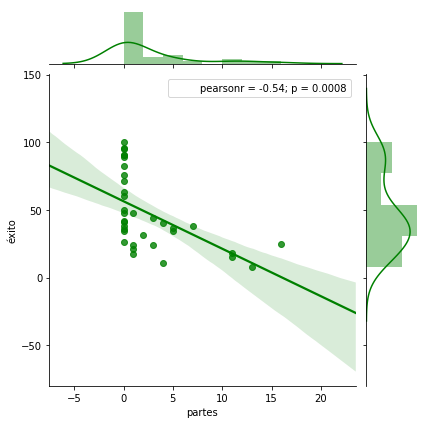

In [727]:
sns.jointplot("partes", "éxito", dfc, kind="reg", color="g");

## Detección de *outliers*

### Bajo número de partes y bajo éxito

In [728]:
dfc[(dfc["partes"] < 10) & (dfc["éxito"] < 10)][["partes", "éxito"]]

,partes,éxito
grupo,,


### Alto número de partes y alto éxito

In [729]:
dfc[(dfc["partes"] > 15) & (dfc["éxito"] > 30)][["partes", "éxito"]]

,partes,éxito
grupo,,


# GRUPOS MÁGICOS

> Son aquellos que tienen mejores valores de éxito escolar, menor absentismo y menos partes de gestión.

\begin{equation}
magic = 0.6 · success + 0.2 · e^{-absence} + 0.2 · e^{-reports}
\end{equation}

In [730]:
df2 = dfc.copy()
df2["magic"] = 0.6 * df2["éxito"] + 0.2 * \
    np.exp(-df2["absentismo"]) + 0.2 * np.exp(-df2["partes"])
magic = df2.sort_values("magic", ascending=False)

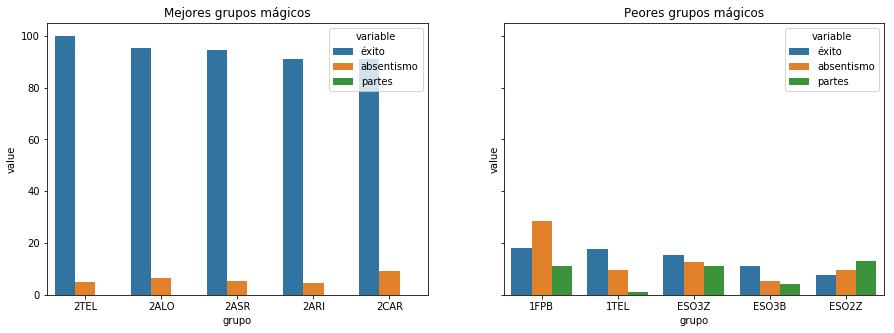

In [731]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
best_magic = pd.melt(magic.head(5).reset_index(), id_vars="grupo", value_vars=[
                     "éxito", "absentismo", "partes"])

g = sns.factorplot(x="grupo", y="value", hue="variable",
                   data=best_magic, kind="bar", ax=ax1)
ax1.set_title("Mejores grupos mágicos")
plt.close(g.fig)
worse_magic = pd.melt(magic.tail(5).reset_index(), id_vars="grupo", value_vars=[
                      "éxito", "absentismo", "partes"])
g = sns.factorplot(x="grupo", y="value", hue="variable",
                   data=worse_magic, kind="bar", ax=ax2)
ax2.set_title("Peores grupos mágicos")
plt.close(g.fig)